# IMAGE ANALYSIS, IMAGE #1

Libary: OpenCV <br>
Aim: identify roots from binary image and collect found root information into csv-file

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from ipywidgets import *
from IPython.display import clear_output, display
import math

In [2]:
# import DETECT_ROOT funcitons 

from root_functions import scale_crop_gray, edge_areas_mask, change_areas_mask, light_areas_mask_color, remove_isolated_pixels
from root_functions import add_text, grab_contours, sort_contours

In [3]:
from ipywidgets import *
from tkinter import Tk, filedialog
%gui tk

In [4]:
# select image

def open_file():
    # Create Tk root
    root = Tk()
    # Hide the main window
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)

    infiles = filedialog.askopenfilename(multiple=True)
    return infiles


In [5]:
filename1 = open_file()

In [6]:
filename1

('C:/Users/OKa/Documents/_OKa/III. JAKSO/4. DS project/HS1/2018.07.24.png',)

In [7]:
# read image

im1 = cv2.imread(filename1[0], 1)

# Get rescaled and cropped images in color and gray
im1, im1_gray = scale_crop_gray(im1)

### Find contours

Find countours and collect contour coordinates to a dictionary<br>
If radius value is zero, root is not taken --> BUT, SHOULD THE RADIUS CRITERIA BE BIGGER THAN ZERO??? 

In [8]:
# find contours

def find_contours(filename, image, mask):
    # find the contours in the mask, then sort them from left to right
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = grab_contours(cnts)
    
    # Sort contours from left to right
    cnts = sort_contours(cnts)[0]
    print(f'Contours: {len(cnts)}')

    # loop over the contours and collect coordinates to the dictionary
    coordinates = {}
    imageID = 0
    for c in cnts:
    # get the bright spot of the image
        (x, y, w, h) = cv2.boundingRect(c)
        ((cX, cY), radius) = cv2.minEnclosingCircle(c)
        if int(radius) <= 5:
            pass
        else:
            imageID += 1
            # coordinates[i] = [filename.split("_")[3], filename, (int(cX), int(cY)), int(radius), 'Y']
            coordinates[imageID] = [filename[0].split('/')[-1], (int(cX), int(cY)), int(radius), 0]
    return coordinates

In [9]:
# create dictionary with image root data

im1_COORDINATES = find_contours(filename1, im1, im1_gray)

Contours: 1


In [10]:
# draw circle around roots and mark center of the circle

def draw_circles_around(image, coordinates, color):
    for i, v in coordinates.items():
        cv2.circle(image, (int(v[1][0]), int(v[1][1])), v[2], color, 2)
        cv2.circle(image, (int(v[1][0]), int(v[1][1])), 0, color, 5)

In [11]:
im1_COORDINATES[1]

['2018.07.24.png', (43, 51), 61, 0]

In [12]:
# draw circles around roots of selected image

draw_circles_around(im1, im1_COORDINATES, (0, 255, 0))


In [13]:
# add text --> root ID

def add_Text(image, coordinates):
    i = 0
    for k, v in coordinates.items():
        i += 1
        cv2.putText(image, "#{}".format(i), (int(v[1][0]+50), int(v[1][1]) - 35), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 255, 0), thickness=2)

In [14]:
add_Text(im1, im1_COORDINATES)

<Figure size 7200x7200 with 0 Axes>

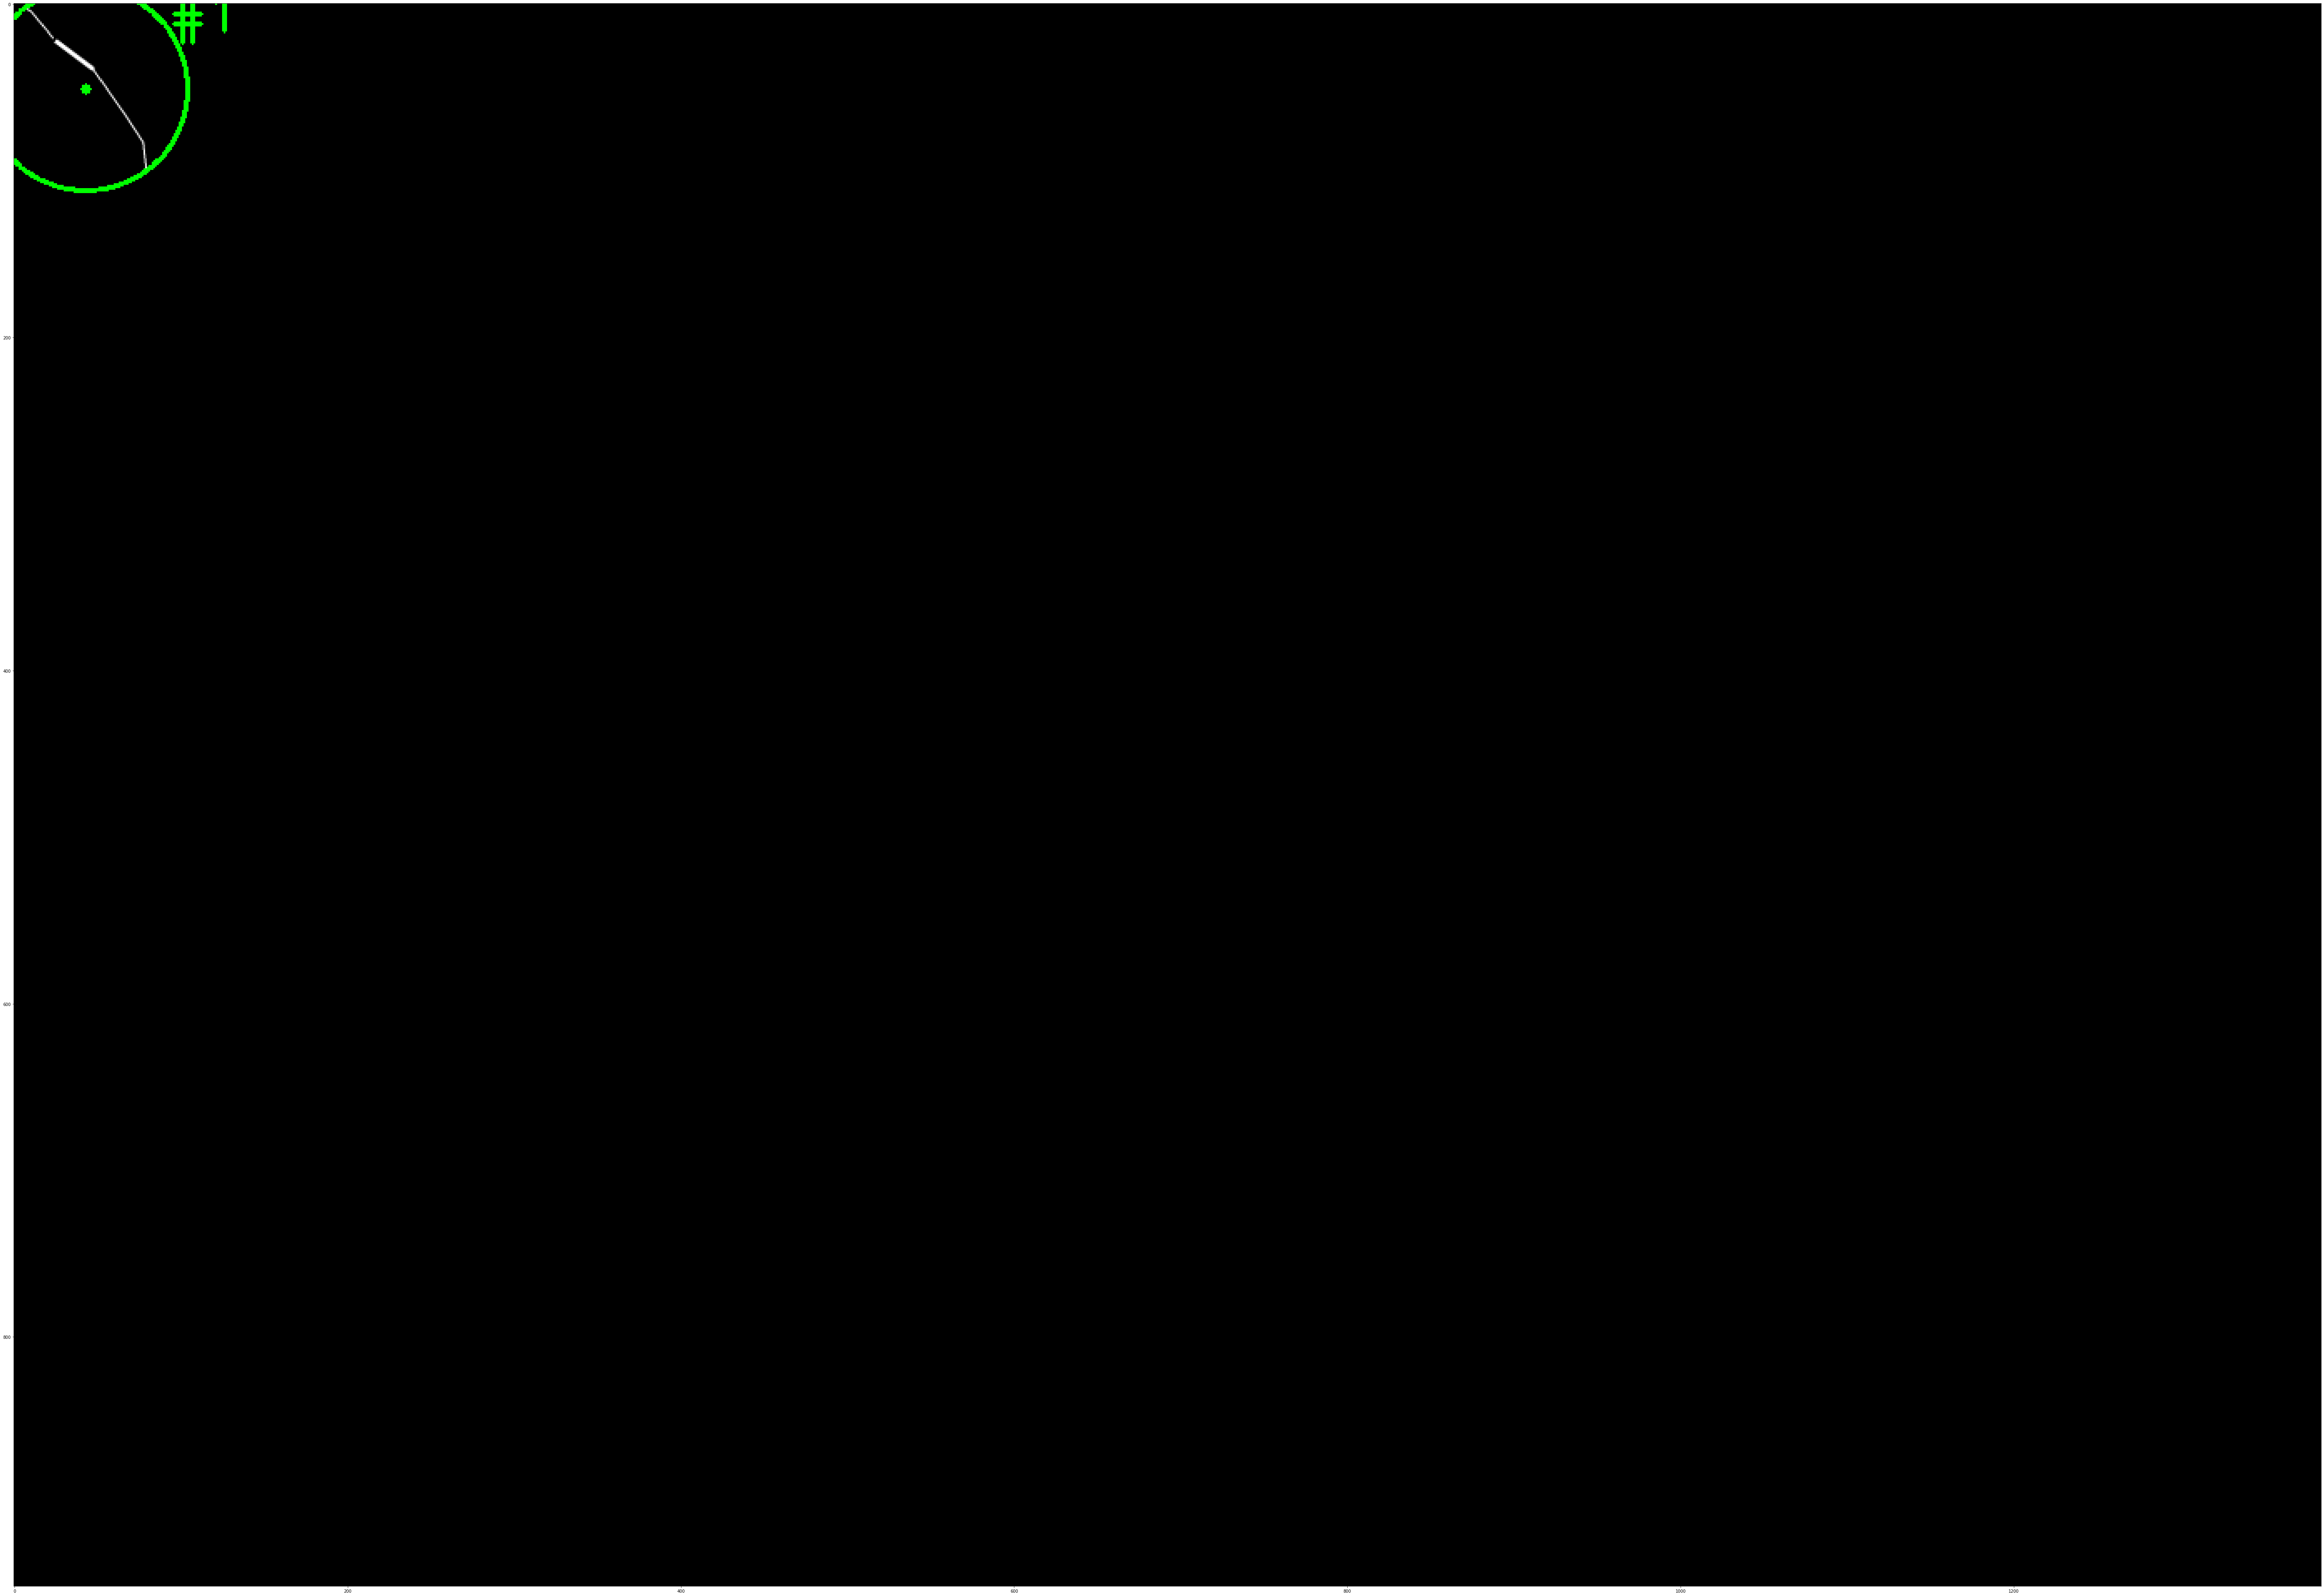

In [15]:
# Display image

plt.figure(figsize=(100,100))
plt.imshow(im1)

In [16]:
# create dataframe with root information from dictionary

image1 = pd.DataFrame.from_dict(im1_COORDINATES, orient='index', columns=['Image','(X,Y) coordinates', 'Radius','Lenght change'])

In [17]:
image1 

,Image,"(X,Y) coordinates",Radius,Lenght change
1,2018.07.24.png,"(43, 51)",61,0


In [18]:
# save data to csv-file

image1.to_csv('outputCSV.csv', sep=';', index_label='ImageID')